# 1. Load the Dataset
Load the distillation column dataset from CSV using pandas. Update the path if needed.

In [1]:
# Load the dataset
import pandas as pd
import os
df = pd.read_csv('dataset.csv', sep=';')
df.head()

,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T11,T12,T13,T14,L,V,D,B,F,Ethanol concentration
0,1.01,350.89,350.95,351.01,351.08,351.16,351.26,351.38,351.54,351.78,...,353.00,355.19,363.77,371.47,780,1040,260,340,600,0.82076
1,1.01,350.86,350.91,350.96,351.02,351.09,351.17,351.28,351.43,351.66,...,352.76,354.66,362.20,370.98,780,1040,260,340,600,0.83253
2,1.01,350.85,350.89,350.93,350.99,351.05,351.13,351.23,351.37,351.58,...,352.55,354.13,360.16,370.10,780,1040,260,340,600,0.83953
3,1.01,350.84,350.88,350.92,350.97,351.03,351.11,351.21,351.34,351.53,...,352.40,353.75,358.45,368.99,780,1040,260,340,600,0.84366
4,1.01,350.83,350.87,350.91,350.96,351.02,351.09,351.18,351.31,351.49,...,352.30,353.50,357.23,367.81,780,1040,260,340,600,0.84622


# 2. Display Basic Dataset Information
Show the shape, data types, and missing values for each column.

In [2]:
# Dataset info
print('Shape:', df.shape)
df.info()
print('\nMissing values per column:')
print(df.isnull().sum())

Shape: (4408, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure               4408 non-null   float64
 1   T1                     4408 non-null   float64
 2   T2                     4408 non-null   float64
 3   T3                     4408 non-null   float64
 4   T4                     4408 non-null   float64
 5   T5                     4408 non-null   float64
 6   T6                     4408 non-null   float64
 7   T7                     4408 non-null   float64
 8   T8                     4408 non-null   float64
 9   T9                     4408 non-null   float64
 10  T10                    4408 non-null   float64
 11  T11                    4408 non-null   float64
 12  T12                    4408 non-null   float64
 13  T13                    4408 non-null   float64
 14  T14                    4408 non-null  

# 3. Summary Statistics and Visualizations
Show summary statistics, histograms, boxplots, and a correlation matrix heatmap for all variables.

       Pressure           T1           T2           T3           T4  \
count   4408.00  4408.000000  4408.000000  4408.000000  4408.000000   
mean       1.01   351.029049   351.409363   352.066202   352.828578   
std        0.00     0.334105     1.125225     2.671189     3.788418   
min        1.01   350.760000   350.770000   350.770000   350.790000   
25%        1.01   350.820000   350.860000   350.900000   350.950000   
50%        1.01   350.900000   350.990000   351.100000   351.260000   
75%        1.01   351.080000   351.390000   351.822500   352.410000   
max        1.01   352.320000   356.030000   364.970000   368.600000   

                T5           T6           T7           T8           T9  \
count  4408.000000  4408.000000  4408.000000  4408.000000  4408.000000   
mean    353.910204   355.214270   356.453975   357.539902   358.484004   
std       4.986453     6.251028     7.119853     7.620257     7.882159   
min     350.800000   350.820000   350.860000   350.910000   351.

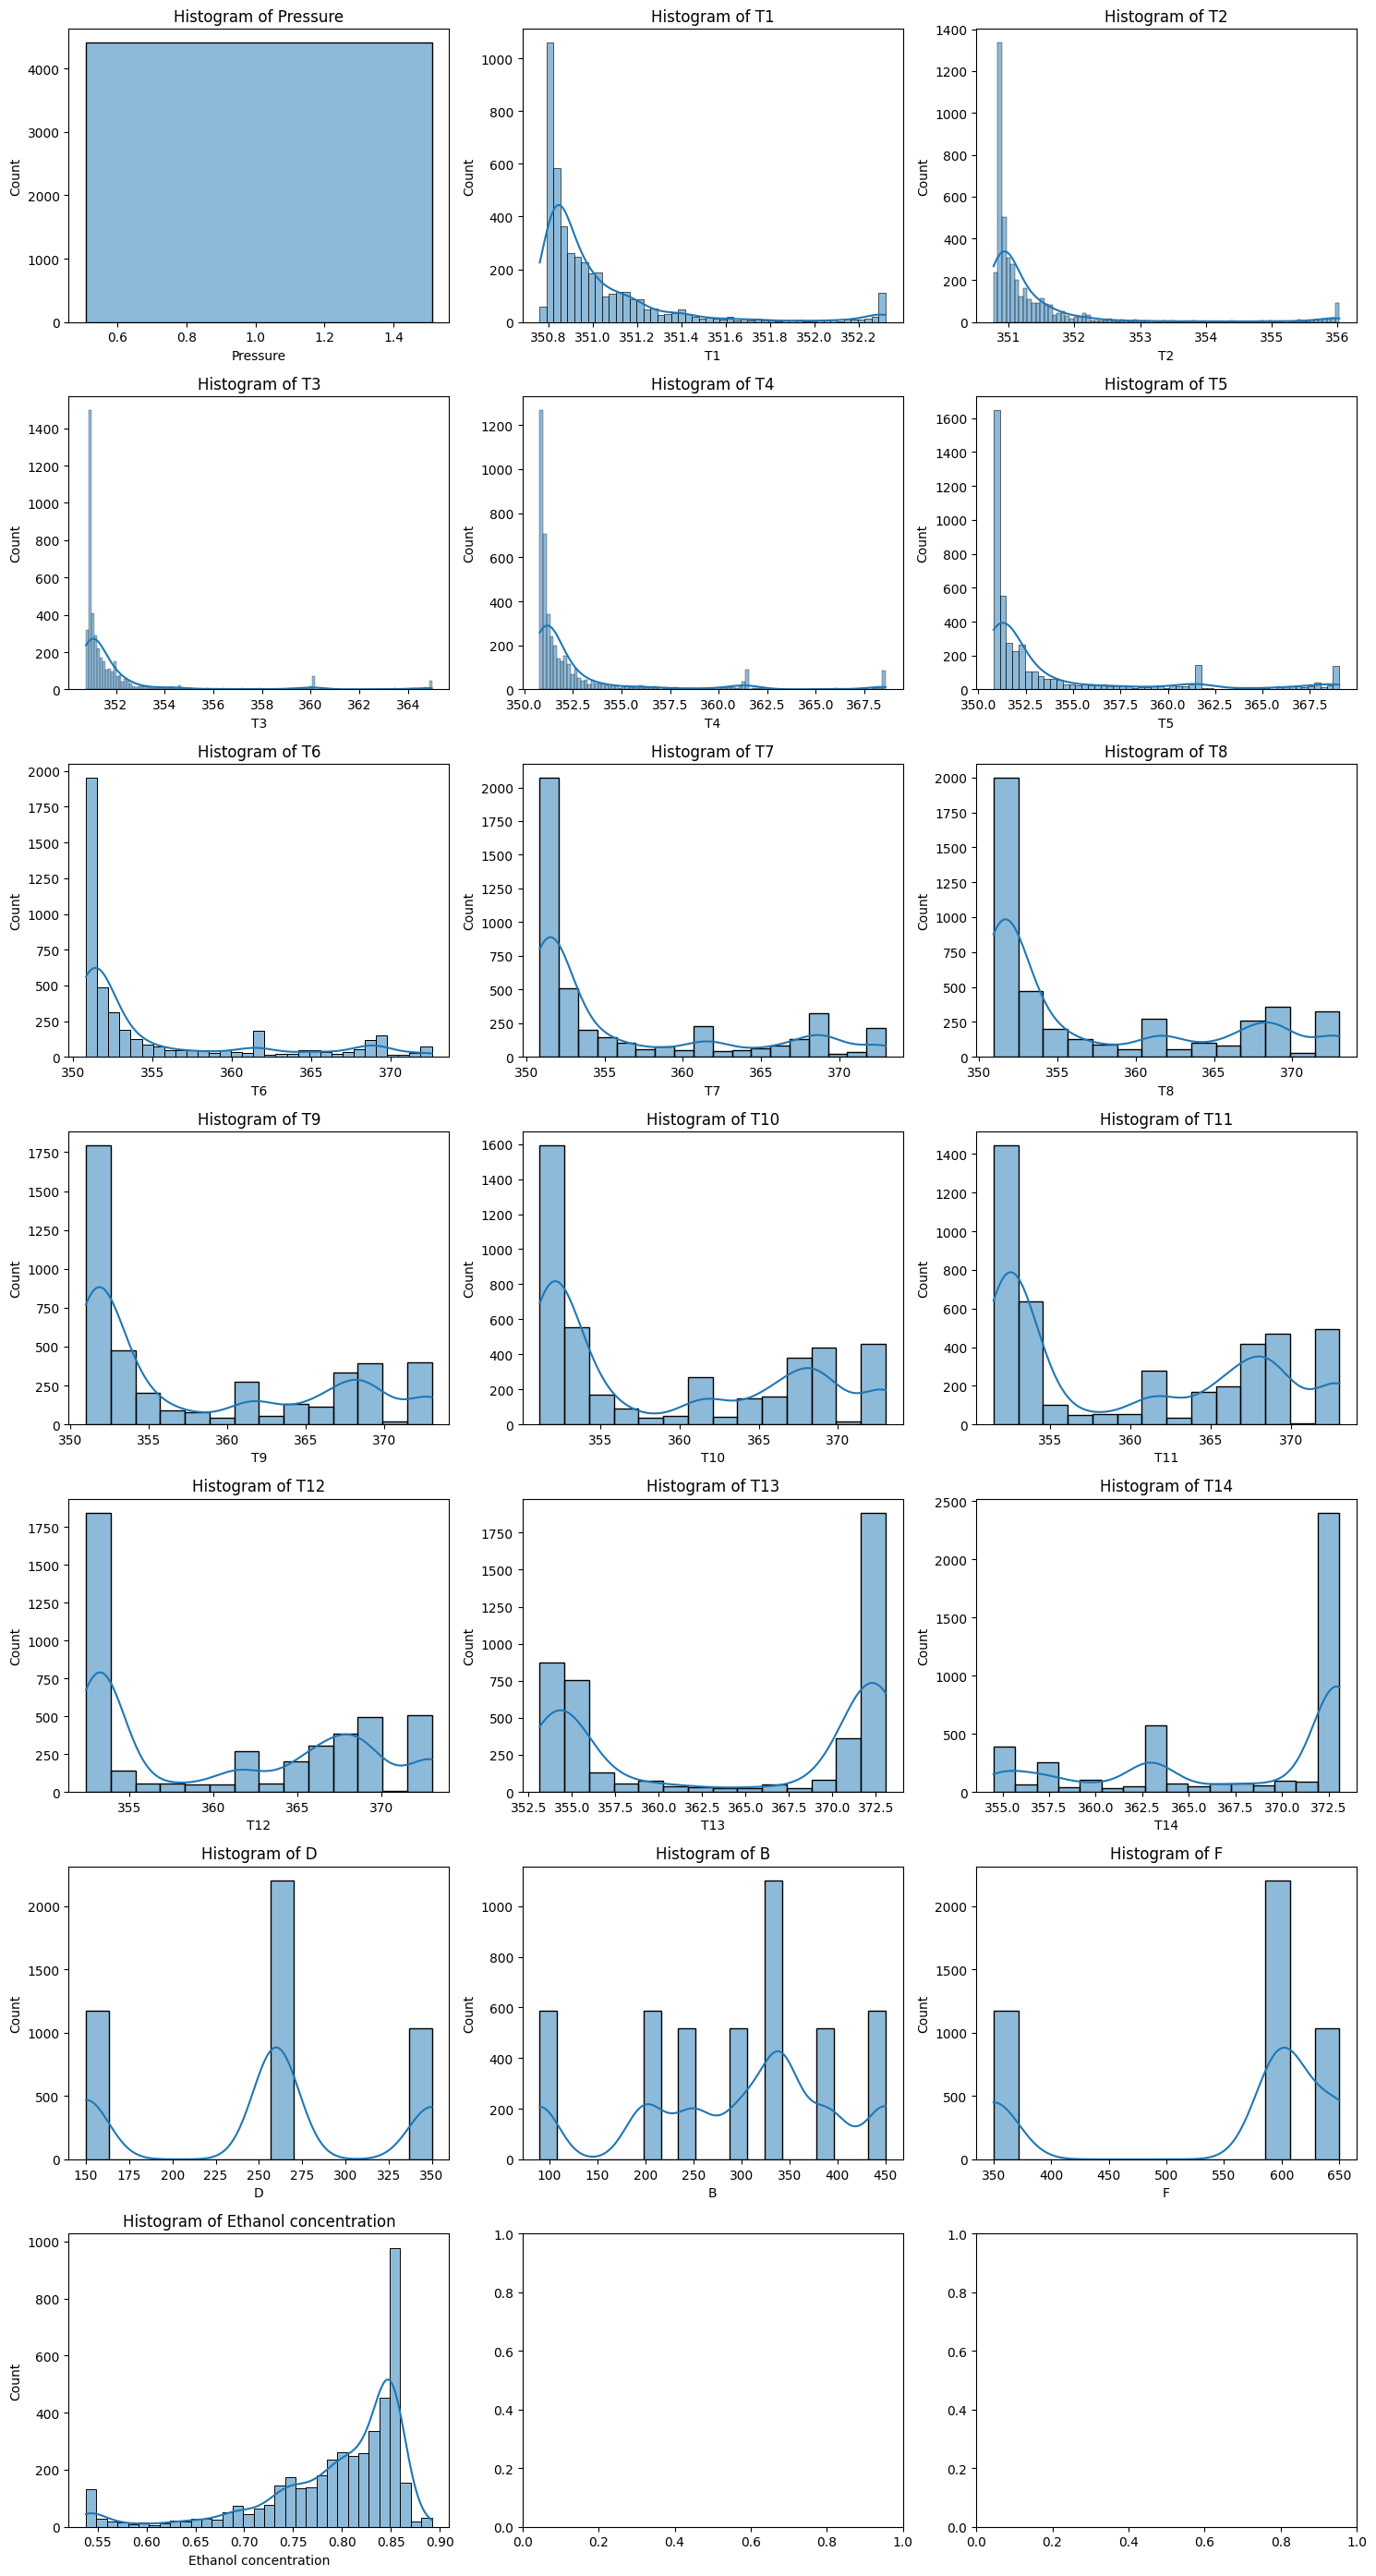

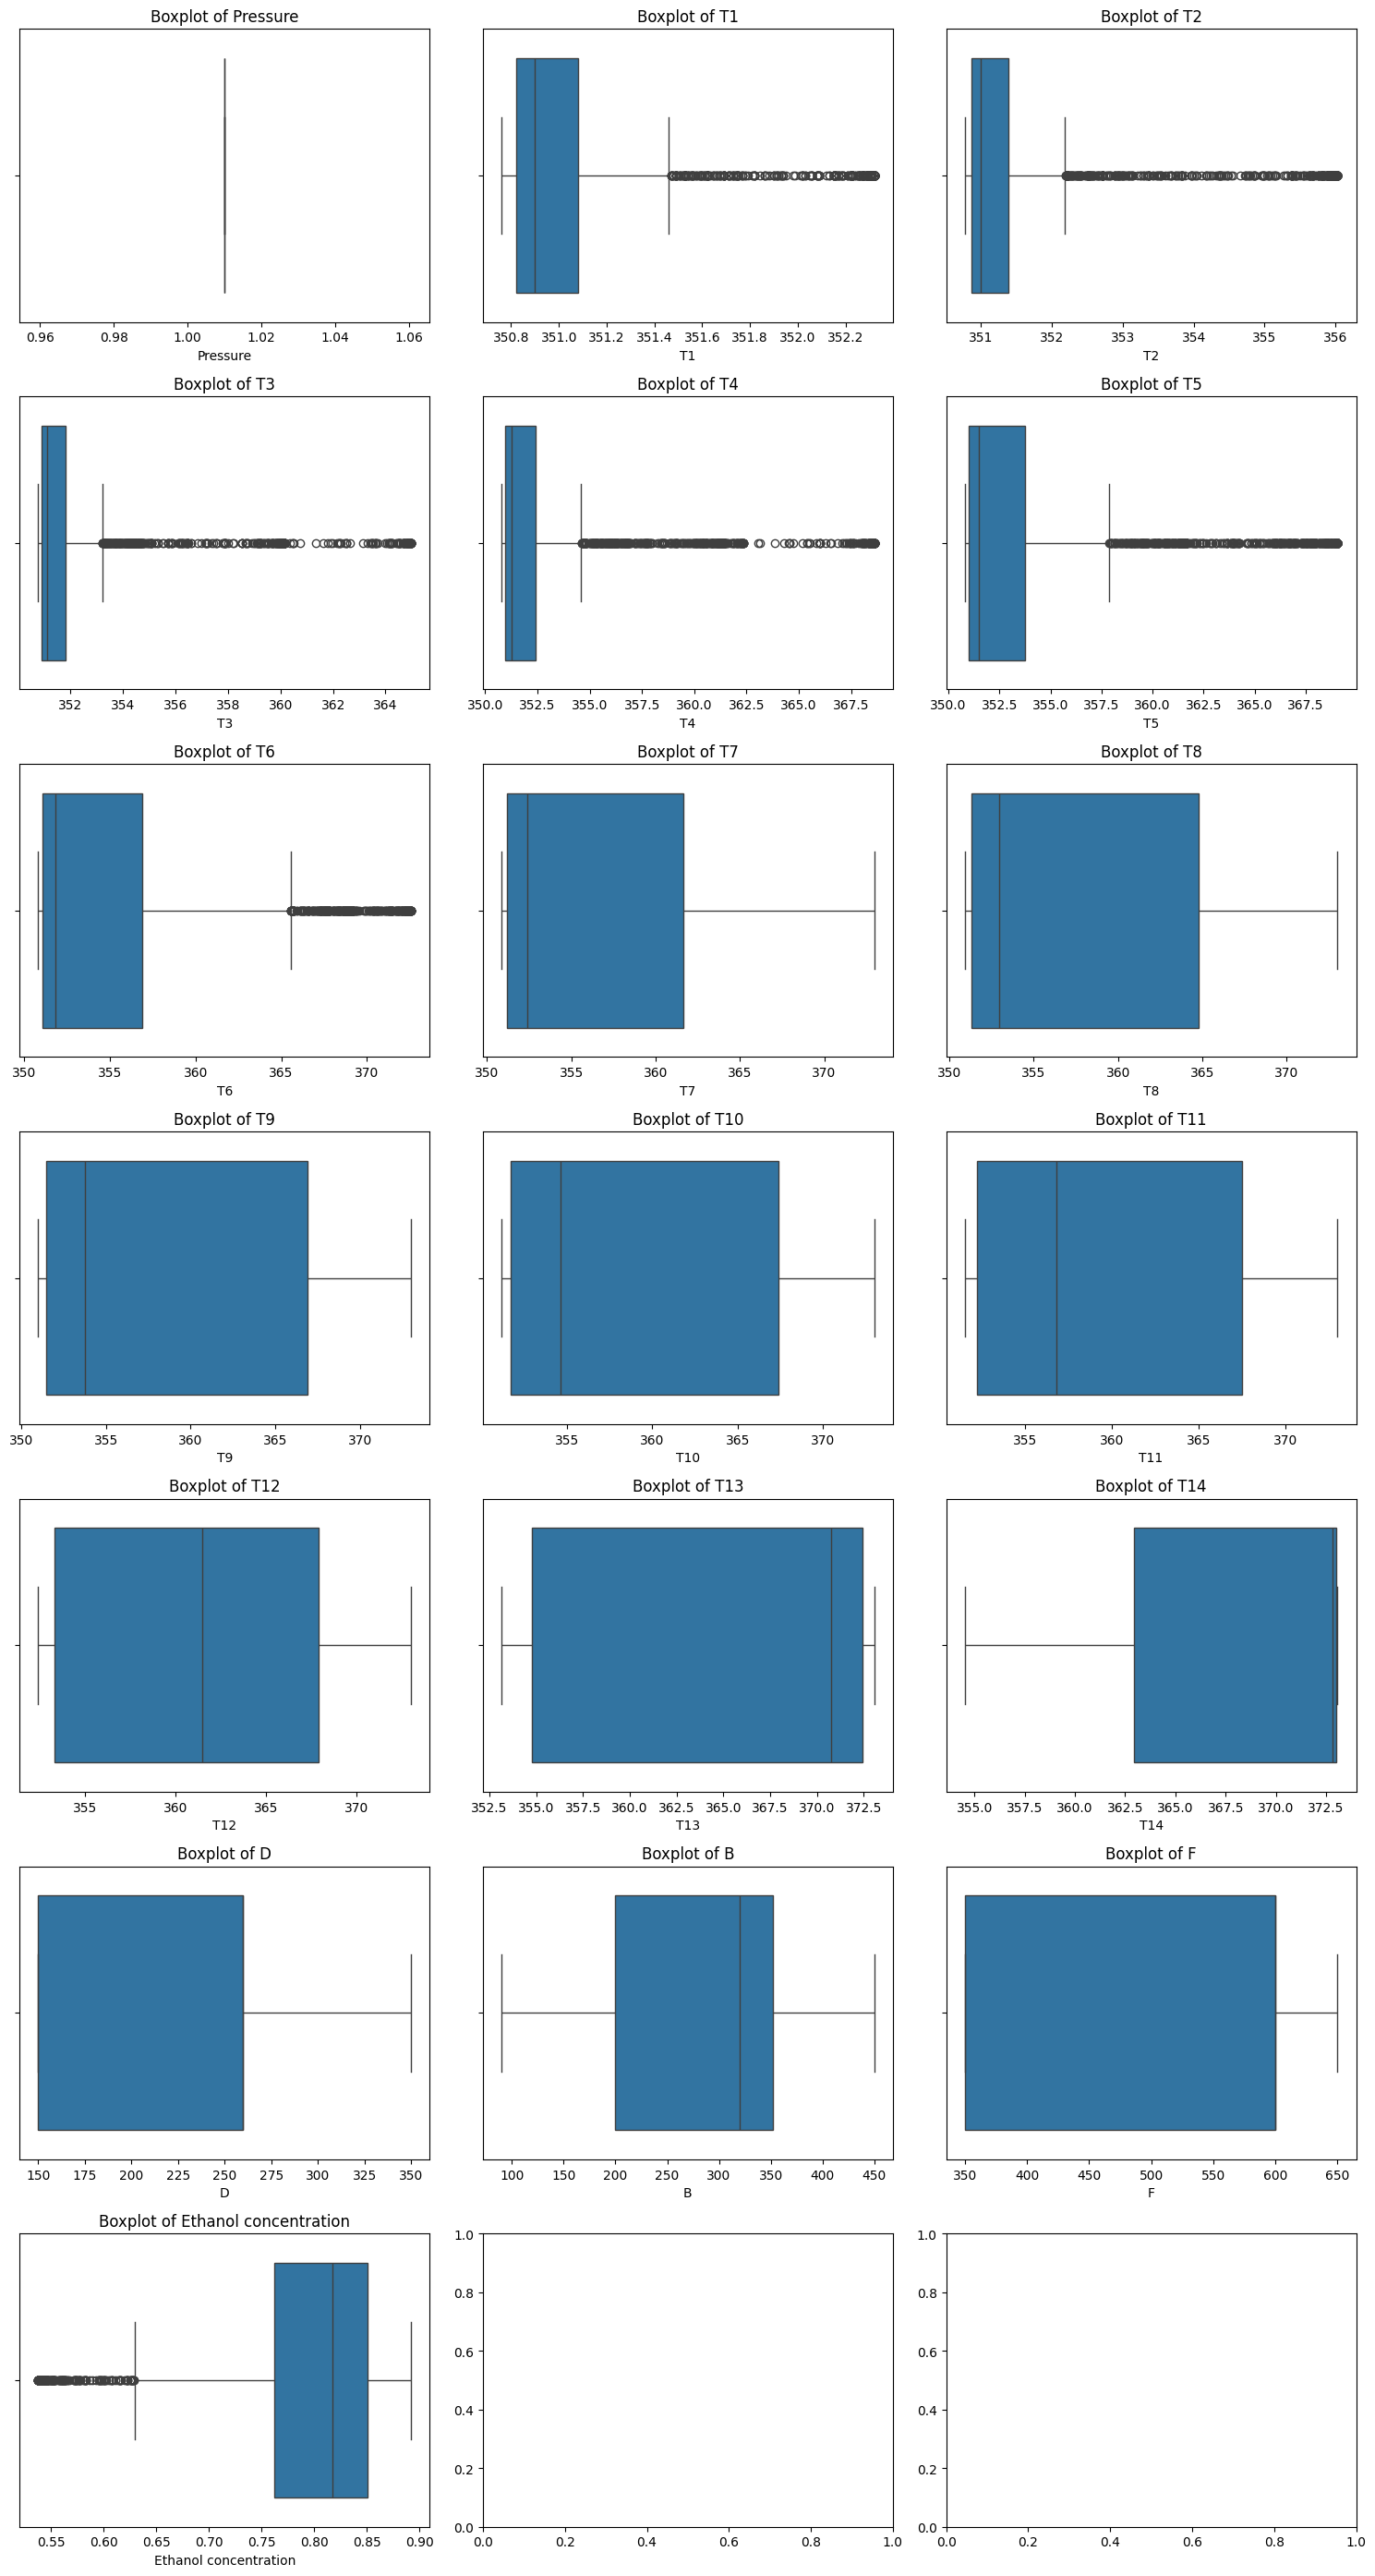

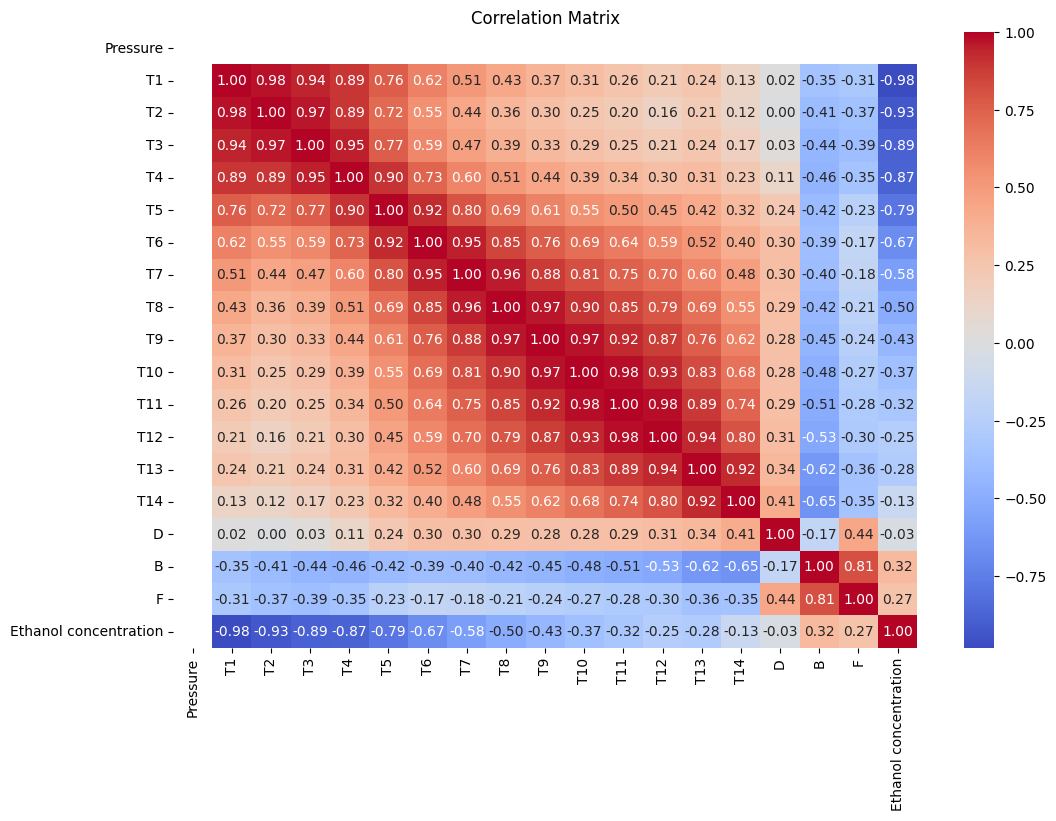

In [5]:
# Summary statistics
import matplotlib.pyplot as plt
import seaborn as sns

# Describe
print(df.describe())

# Histograms
num_cols = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(len(num_cols)//3+1, 3, figsize=(15, 4*(len(num_cols)//3+1)))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Boxplots
fig, axes = plt.subplots(len(num_cols)//3+1, 3, figsize=(15, 4*(len(num_cols)//3+1)))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 5. Detect and Remove Outliers
Identify outliers using the IQR method and remove extreme rows from the dataset.

In [6]:
# Remove outliers using IQR
num_cols = df.select_dtypes(include='number').columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
mask = ~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[mask].reset_index(drop=True)
print('Shape after outlier removal:', df.shape)

Shape after outlier removal: (3557, 21)


# 6. Add Feature Engineering Columns
Create new features: TempDiff (T14 - T1) and mean_Temp (mean of T1 to T14).

In [7]:
# Feature engineering
tray_cols = [f'T{i}' for i in range(1, 15) if f'T{i}' in df.columns]
df['TempDiff'] = df['T14'] - df['T1']
df['mean_Temp'] = df[tray_cols].mean(axis=1)
df[['TempDiff', 'mean_Temp']].head()

,TempDiff,mean_Temp
0,20.58,354.047143
1,20.12,353.786429
2,19.25,353.490714
3,18.15,353.232143
4,16.98,353.020000


# 7. Drop Unnecessary Columns
Remove the Pressure column from the dataset.

In [8]:
# Drop Pressure column if present
if 'Pressure' in df.columns:
    df.drop('Pressure', axis=1, inplace=True)
df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T13,T14,L,V,D,B,F,Ethanol concentration,TempDiff,mean_Temp
0,350.89,350.95,351.01,351.08,351.16,351.26,351.38,351.54,351.78,352.18,...,363.77,371.47,780,1040,260,340,600,0.82076,20.58,354.047143
1,350.86,350.91,350.96,351.02,351.09,351.17,351.28,351.43,351.66,352.03,...,362.20,370.98,780,1040,260,340,600,0.83253,20.12,353.786429
2,350.85,350.89,350.93,350.99,351.05,351.13,351.23,351.37,351.58,351.91,...,360.16,370.10,780,1040,260,340,600,0.83953,19.25,353.490714
3,350.84,350.88,350.92,350.97,351.03,351.11,351.21,351.34,351.53,351.83,...,358.45,368.99,780,1040,260,340,600,0.84366,18.15,353.232143
4,350.83,350.87,350.91,350.96,351.02,351.09,351.18,351.31,351.49,351.78,...,357.23,367.81,780,1040,260,340,600,0.84622,16.98,353.020000


# 8. Save Cleaned Dataset
Save the cleaned dataset to 'cleaned_distillation.csv' for use in the next notebook.

In [9]:
# Save cleaned dataset
df.to_csv('cleaned_distillation.csv', index=False)
print('Cleaned dataset saved as cleaned_distillation.csv')

Cleaned dataset saved as cleaned_distillation.csv
